In [4]:
import pandas as pd
import plotly.graph_objects as go

In [2]:
df = pd.read_csv(r"..\data\processed\df.csv", 
                 index_col=0, 
                 parse_dates=True,
                     dtype={
                        "Open": float,
                        "High": float,
                        "Low": float,
                        "Close": float,
                        "Volume": float,  # ou int, se quiser
                    }).reset_index()
df

,Date,Close,High,Low,Open,Volume
0,2000-01-03,1.156394,1.156394,1.156394,1.156394,3.538944e+10
1,2000-01-04,1.092423,1.092423,1.092423,1.092423,2.886144e+10
2,2000-01-05,1.081401,1.081401,1.081401,1.081401,4.303360e+10
3,2000-01-06,1.077661,1.077661,1.077661,1.077661,3.405568e+10
4,2000-01-07,1.082582,1.082582,1.082582,1.082582,2.091264e+10
...,...,...,...,...,...,...
6463,2025-09-29,31.809999,32.540001,31.730000,32.259998,3.572000e+07
6464,2025-09-30,31.459999,31.900000,31.160000,31.690001,4.861150e+07
6465,2025-10-01,31.379999,31.549999,31.299999,31.450001,2.481700e+07
6466,2025-10-02,31.080000,31.410000,31.020000,31.379999,2.549710e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6468 non-null   datetime64[ns]
 1   Close   6468 non-null   float64       
 2   High    6468 non-null   float64       
 3   Low     6468 non-null   float64       
 4   Open    6468 non-null   float64       
 5   Volume  6468 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 303.3 KB


In [7]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,6468,6468.000000,6468.000000,6468.000000,6468.000000,6.468000e+03
mean,2012-10-12 12:56:19.591836672,7.315012,7.418546,7.217941,7.320503,5.043971e+08
min,2000-01-03 00:00:00,0.861144,0.875661,0.846382,0.866065,0.000000e+00
25%,2006-03-30 18:00:00,2.561459,2.621981,2.517406,2.566882,2.199530e+07
50%,2012-09-27 12:00:00,4.955378,5.037830,4.877403,4.958310,3.465085e+07
75%,2019-04-08 06:00:00,7.722461,7.818561,7.626780,7.744408,5.484085e+07
max,2025-10-03 00:00:00,35.662773,35.810985,35.486776,35.690565,7.356416e+10
std,NaN,7.792881,7.872904,7.713842,7.793215,3.720997e+09


In [15]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

<Axes: >

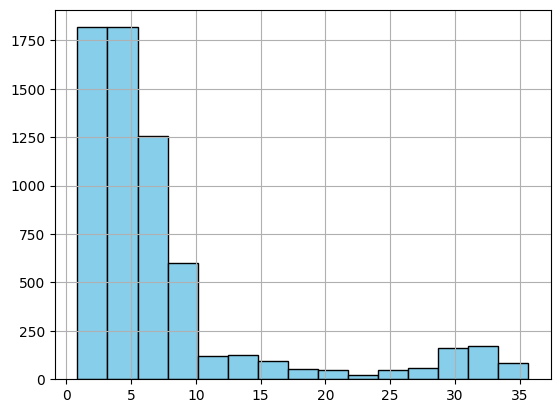

In [20]:
df['Close'].hist(bins=15, color='skyblue', edgecolor='black')

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [12]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [22]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df['Date'],
        y=df['Volume'],
        name='Volume',
        marker_color='blue'
    )
)

fig.update_layout(
    title='Volume por Data',
    xaxis_title='Data',
    yaxis_title='Volume',
    template='plotly_white'
)

fig.show()


In [ ]:
# Filtra a partir de julho de 2000 por problema no volume
df = df[df['Date'] >= '2000-07-01']

           Date      Close       High        Low       Open      Volume
130  2000-07-03   1.377831   1.377831   1.377831   1.377831  22694400.0
131  2000-07-04   1.407356   1.407356   1.407356   1.407356  21155200.0
132  2000-07-05   1.372911   1.372911   1.372911   1.372911  40316800.0
133  2000-07-06   1.372911   1.372911   1.372911   1.372911  29712000.0
134  2000-07-07   1.320012   1.320012   1.320012   1.320012  48684800.0
...         ...        ...        ...        ...        ...         ...
6463 2025-09-29  31.809999  32.540001  31.730000  32.259998  35720000.0
6464 2025-09-30  31.459999  31.900000  31.160000  31.690001  48611500.0
6465 2025-10-01  31.379999  31.549999  31.299999  31.450001  24817000.0
6466 2025-10-02  31.080000  31.410000  31.020000  31.379999  25497100.0
6467 2025-10-03  31.000000  31.330000  31.000000  31.160000  19756800.0

[6338 rows x 6 columns]


In [34]:
# Agrupa por mês usando pd.Grouper e soma o volume
df_monthly = df.groupby(pd.Grouper(key='Date', freq='ME'))['Volume'].sum().reset_index()
df_monthly.rename(columns={'Volume': 'Volume_Sum'}, inplace=True)
df_monthly

,Date,Volume_Sum
0,2000-07-31,8.185696e+08
1,2000-08-31,1.772378e+09
2,2000-09-30,6.919072e+08
3,2000-10-31,7.715776e+08
4,2000-11-30,6.390816e+08
...,...,...
299,2025-06-30,8.791368e+08
300,2025-07-31,5.521236e+08
301,2025-08-31,7.044772e+08
302,2025-09-30,6.376416e+08


In [33]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df['Date'],
        y=df['Volume'],
        name='Volume',
        marker_color='red'
    )
)

fig.update_layout(
    title='Volume em 2000',
    xaxis_title='Data',
    yaxis_title='Volume',
    template='plotly_white'
)

fig.show()